In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import tensorflow.keras.regularizers as regularizers
l2_regularizer = regularizers.l2(0.001)
import tensorflow as tf
from tensorflow.keras.regularizers import l2
# regularizer = l2(0.001)

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# download yolo from yolo
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode= checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=', 'checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS a

In [ ]:
!pip install bbox


In [ ]:
%matplotlib inline
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# download dataset for yolo
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LAVlZ4gjwlnGTdQ6HRBA")
project = rf.workspace("lakshantha-dissanayake").project("apple-detection-5z37o")
version = project.version(1)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.30, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Apple-Detection-1 in yolov8:: 100%|██████████| 1407/1407 [00:00<00:00, 9502.42it/s]


In [ ]:
# work training

import os
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('/content/Apple-Detection-1/train')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/Apple-Detection-1/data.yaml', epochs=50, imgsz=640)


WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Apple-Detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, s

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train2', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /content/Apple-Detection-1/train/labels... 553 images, 0 backgrounds, 0 corrupt: 100%|██████████| 553/553 [00:00<00:00, 1863.10it/s]


train: New cache created: /content/Apple-Detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Apple-Detection-1/valid/labels... 146 images, 0 backgrounds, 0 corrupt: 100%|██████████| 146/146 [00:00<00:00, 835.96it/s]

val: New cache created: /content/Apple-Detection-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.49G      1.199      1.749      1.346         67        640: 100%|██████████| 35/35 [00:15<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        146        572      0.796       0.65      0.729      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.34G      1.254      1.194      1.327         92        640: 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


                   all        146        572      0.702      0.734      0.752      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.24G      1.254      1.188      1.356         65        640: 100%|██████████| 35/35 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]


                   all        146        572      0.623      0.663      0.674      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.35G      1.304      1.171      1.383         67        640: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]


                   all        146        572      0.714      0.675      0.765      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.37G      1.262      1.065      1.353         51        640: 100%|██████████| 35/35 [00:11<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]

                   all        146        572      0.716      0.727      0.726      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.26G      1.277      1.072      1.353         31        640: 100%|██████████| 35/35 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        146        572      0.676      0.719      0.718      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.28G      1.212     0.9977      1.316         37        640: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        146        572      0.777      0.732      0.808      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.24G      1.207     0.9495      1.295         57        640: 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all        146        572      0.691      0.741      0.776      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.34G      1.207     0.9324      1.318         90        640: 100%|██████████| 35/35 [00:09<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]


                   all        146        572      0.727      0.746      0.786      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.25G      1.195     0.8901      1.301         61        640: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        146        572      0.783      0.815       0.85      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G      1.187     0.8881      1.283         78        640: 100%|██████████| 35/35 [00:09<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        146        572      0.766      0.753       0.83      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G      1.177     0.8347      1.281         70        640: 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all        146        572      0.832      0.787      0.864      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.37G      1.171     0.8226      1.272         56        640: 100%|██████████| 35/35 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]

                   all        146        572      0.817      0.809      0.875      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.34G      1.136     0.8355      1.271         66        640: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all        146        572       0.83      0.813      0.873      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.27G      1.145     0.8282      1.271         50        640: 100%|██████████| 35/35 [00:10<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.59it/s]

                   all        146        572      0.834      0.794      0.883      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.36G      1.128     0.7783      1.264         55        640: 100%|██████████| 35/35 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        146        572      0.841       0.82       0.89      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.23G      1.123     0.7985      1.256         95        640: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]


                   all        146        572      0.819      0.795      0.866      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.23G       1.12     0.7809      1.254         66        640: 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        146        572      0.803      0.857      0.896      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.34G      1.125     0.7786      1.253         54        640: 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        146        572      0.806      0.852       0.89      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.33G      1.116     0.7705      1.237         95        640: 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        146        572      0.835      0.831      0.888      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G      1.114     0.7793      1.247         60        640: 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        146        572      0.829      0.836      0.887      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G      1.113     0.7417      1.236         59        640: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        146        572      0.836      0.855      0.895      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G      1.104      0.734      1.237         56        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        146        572       0.86      0.793      0.877      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.31G      1.057     0.7177      1.214         49        640: 100%|██████████| 35/35 [00:10<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]

                   all        146        572      0.849      0.827      0.898      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.26G       1.07     0.7266      1.208         63        640: 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        146        572      0.836      0.875      0.904      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G      1.078     0.7147      1.214         63        640: 100%|██████████| 35/35 [00:09<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        146        572      0.802      0.873      0.898      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.35G       1.11     0.7167      1.226         58        640: 100%|██████████| 35/35 [00:10<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all        146        572      0.785       0.89      0.898      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.37G      1.061      0.689       1.21         68        640: 100%|██████████| 35/35 [00:10<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        146        572      0.852      0.865      0.914      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.24G      1.059     0.6757      1.201         53        640: 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all        146        572      0.841      0.848      0.904      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.37G      1.085     0.7008      1.213         66        640: 100%|██████████| 35/35 [00:09<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        146        572      0.866       0.86      0.916      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G      1.051     0.6614      1.197         71        640: 100%|██████████| 35/35 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]

                   all        146        572      0.825      0.876      0.909       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.28G       1.04     0.6647      1.191         73        640: 100%|██████████| 35/35 [00:09<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        146        572      0.859      0.839      0.907      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.34G      1.051     0.6651      1.212         46        640: 100%|██████████| 35/35 [00:09<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        146        572      0.872      0.843      0.913      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G      1.032     0.6331       1.19         61        640: 100%|██████████| 35/35 [00:09<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        146        572      0.864      0.865      0.926      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.33G      1.037     0.6602      1.202         29        640: 100%|██████████| 35/35 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.99it/s]

                   all        146        572      0.848      0.867      0.917      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.36G      1.035     0.6422      1.185         68        640: 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        146        572      0.857      0.865       0.92      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.3G      1.042     0.6337      1.183         77        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        146        572      0.873      0.836      0.909      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.38G      1.032     0.6445      1.182         46        640: 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        146        572      0.855      0.867      0.906      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.35G      1.013     0.6494      1.191         48        640: 100%|██████████| 35/35 [00:10<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]

                   all        146        572      0.884       0.85      0.918      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.38G      1.009     0.6252      1.167         64        640: 100%|██████████| 35/35 [00:10<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        146        572      0.873      0.851      0.918      0.626


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.5G      0.966      0.596      1.154         25        640: 100%|██████████| 35/35 [00:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        146        572      0.856      0.875       0.91      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.36G     0.9444     0.5396      1.135         29        640: 100%|██████████| 35/35 [00:09<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.94it/s]

                   all        146        572      0.854      0.879      0.919       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.35G     0.9481     0.5291      1.155         19        640: 100%|██████████| 35/35 [00:09<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        146        572      0.865      0.869      0.923      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.36G     0.9475     0.5351       1.14         64        640: 100%|██████████| 35/35 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all        146        572      0.864      0.878      0.919      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.36G     0.9307     0.5157      1.131         21        640: 100%|██████████| 35/35 [00:09<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

                   all        146        572      0.851      0.896      0.922      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.36G     0.9101     0.5094      1.128         36        640: 100%|██████████| 35/35 [00:09<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        146        572      0.859      0.881      0.917      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.33G     0.9035     0.5128      1.127         38        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        146        572      0.852      0.876      0.921       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.34G     0.9175     0.5034      1.131         23        640: 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all        146        572      0.855      0.885      0.928      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.37G     0.9011     0.4861       1.11         28        640: 100%|██████████| 35/35 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.01it/s]

                   all        146        572      0.857      0.887      0.926      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.23G     0.8875     0.4888      1.114         30        640: 100%|██████████| 35/35 [00:09<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        146        572      0.854      0.881      0.925       0.65



50 epochs completed in 0.170 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


                   all        146        572      0.855      0.885      0.928      0.653
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Model/YOLO_model2.h5')  # Change path as necessary

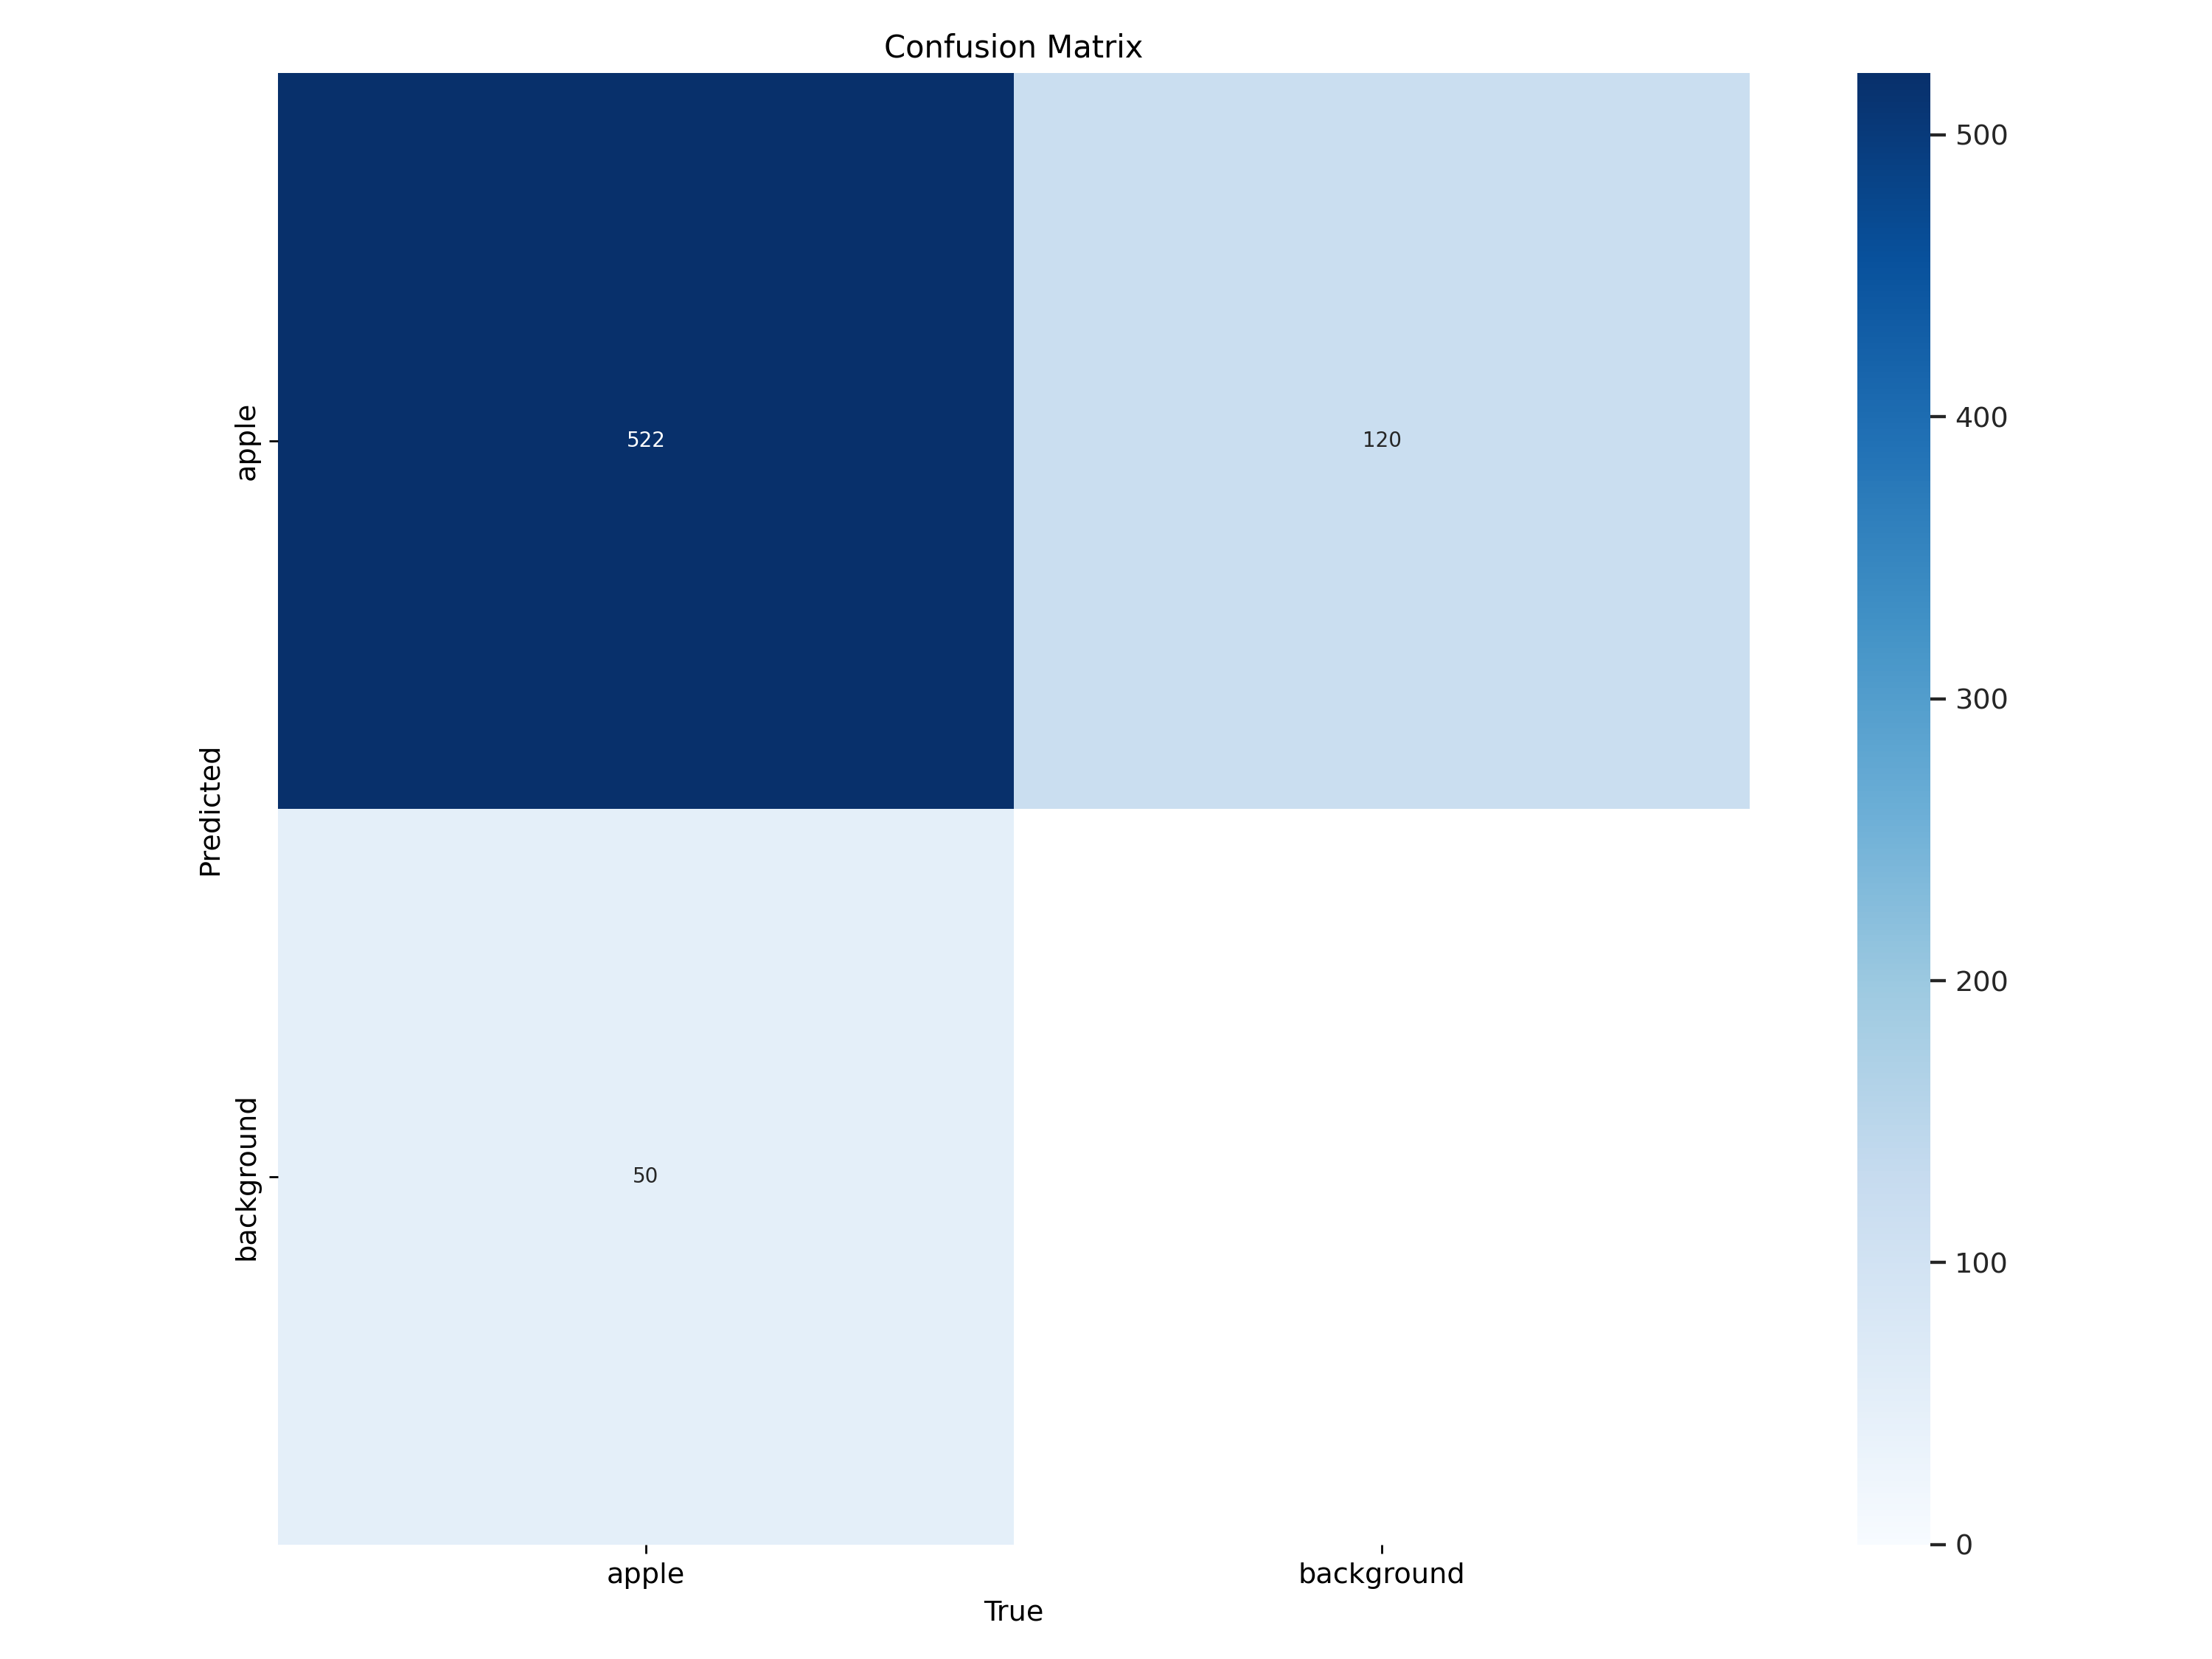

In [ ]:
# This code will display the confusion matrix image that is saved in the /content/runs/detect/train/ directory.
from IPython.display import Image
Image(filename = f'/content/runs/detect/train2/confusion_matrix.png',width=600)


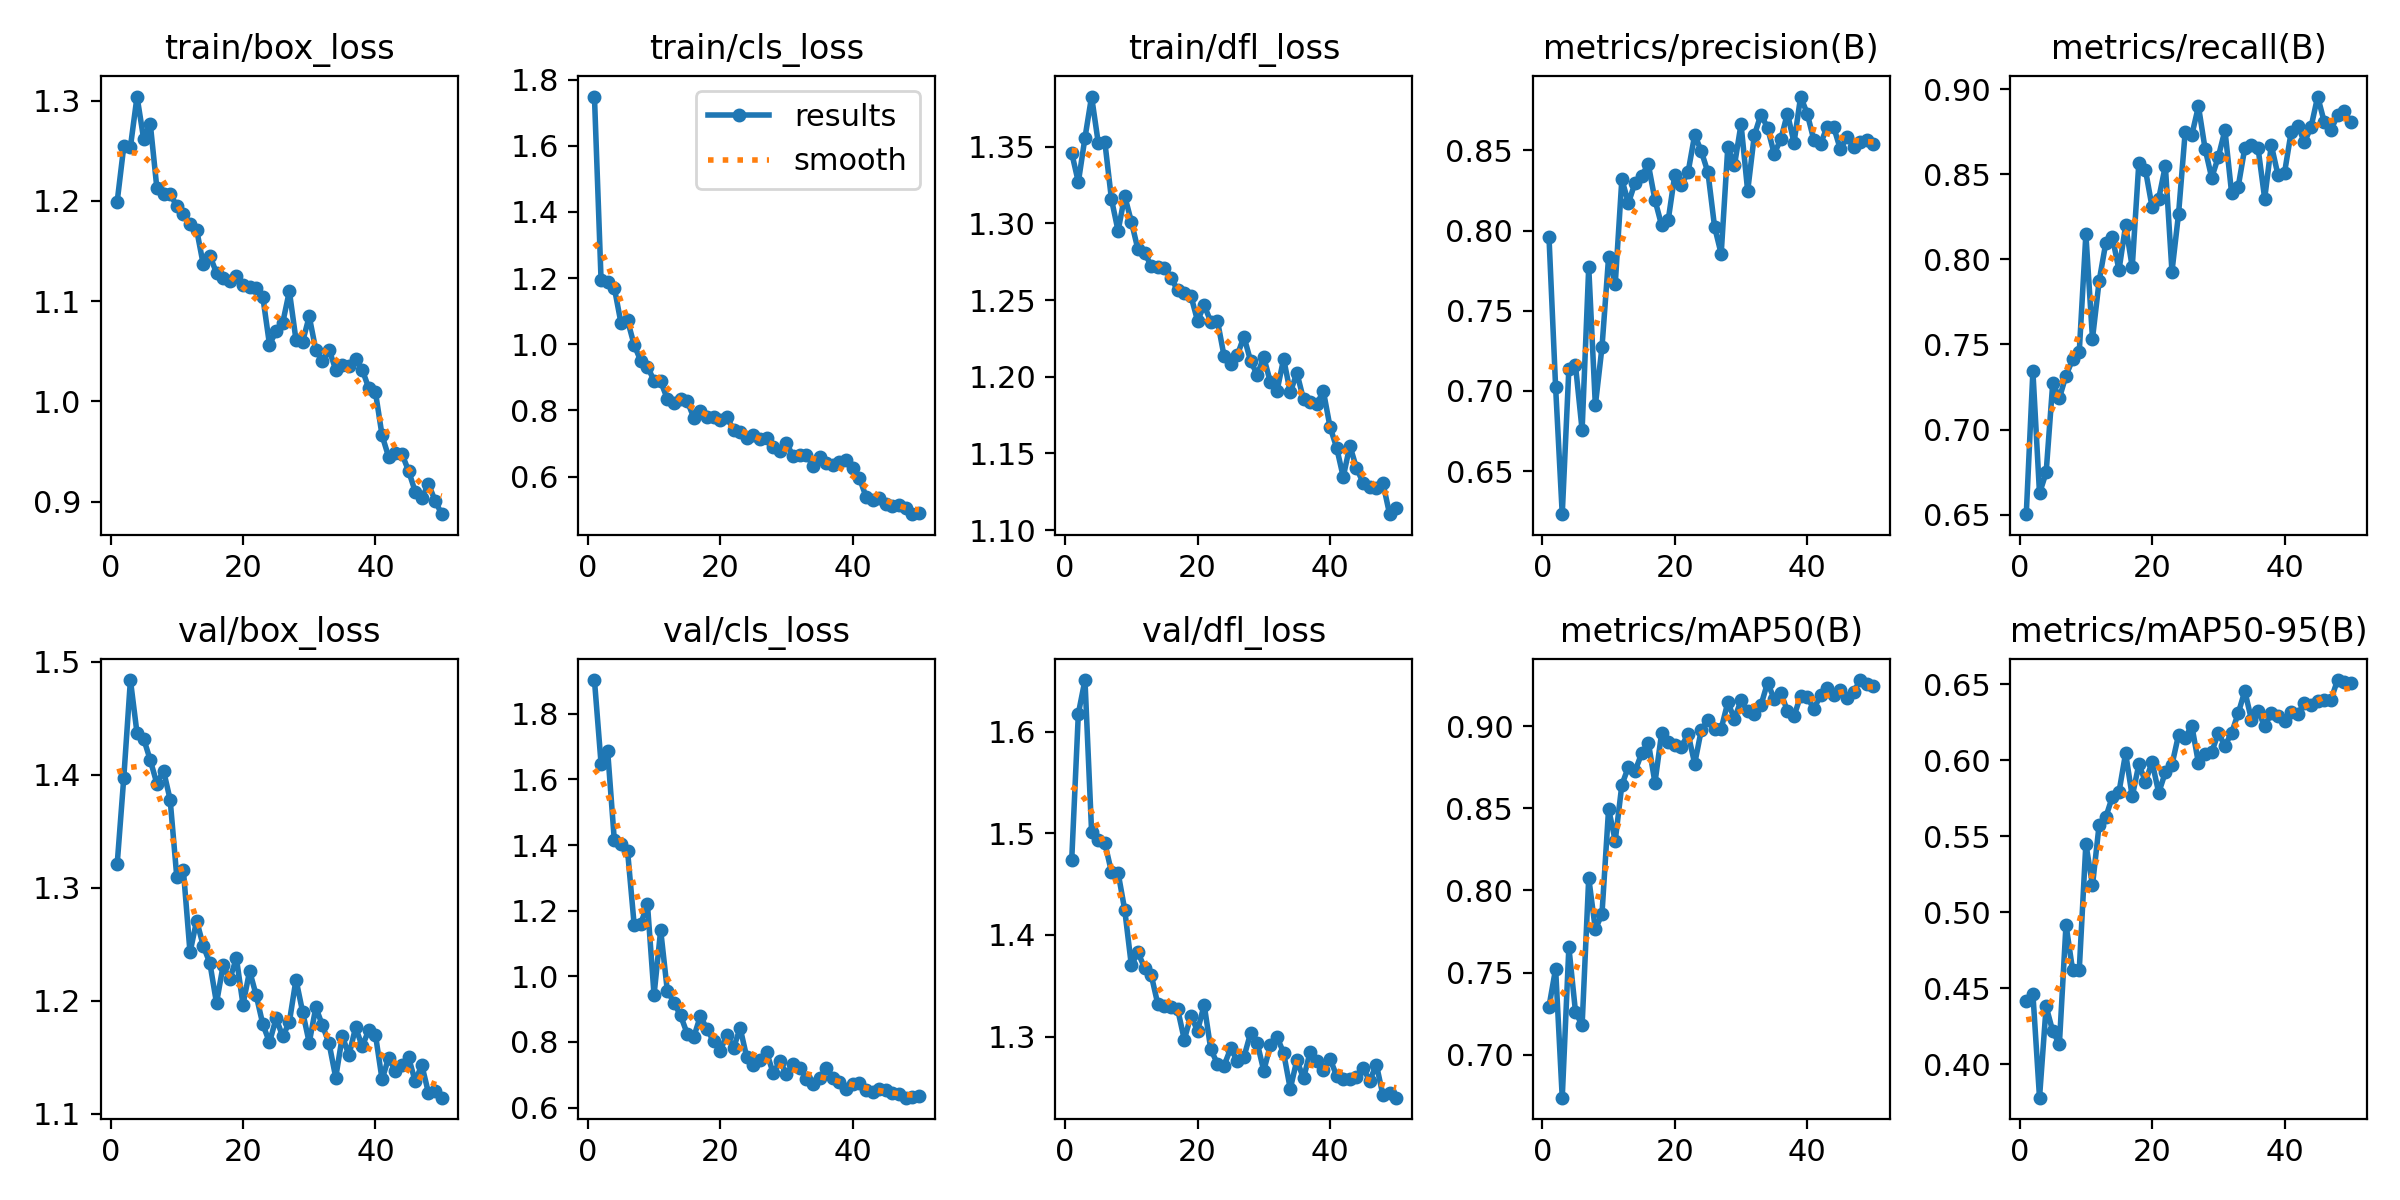

In [ ]:
Image(filename = f'/content/runs/detect/train2/results.png',width=600)

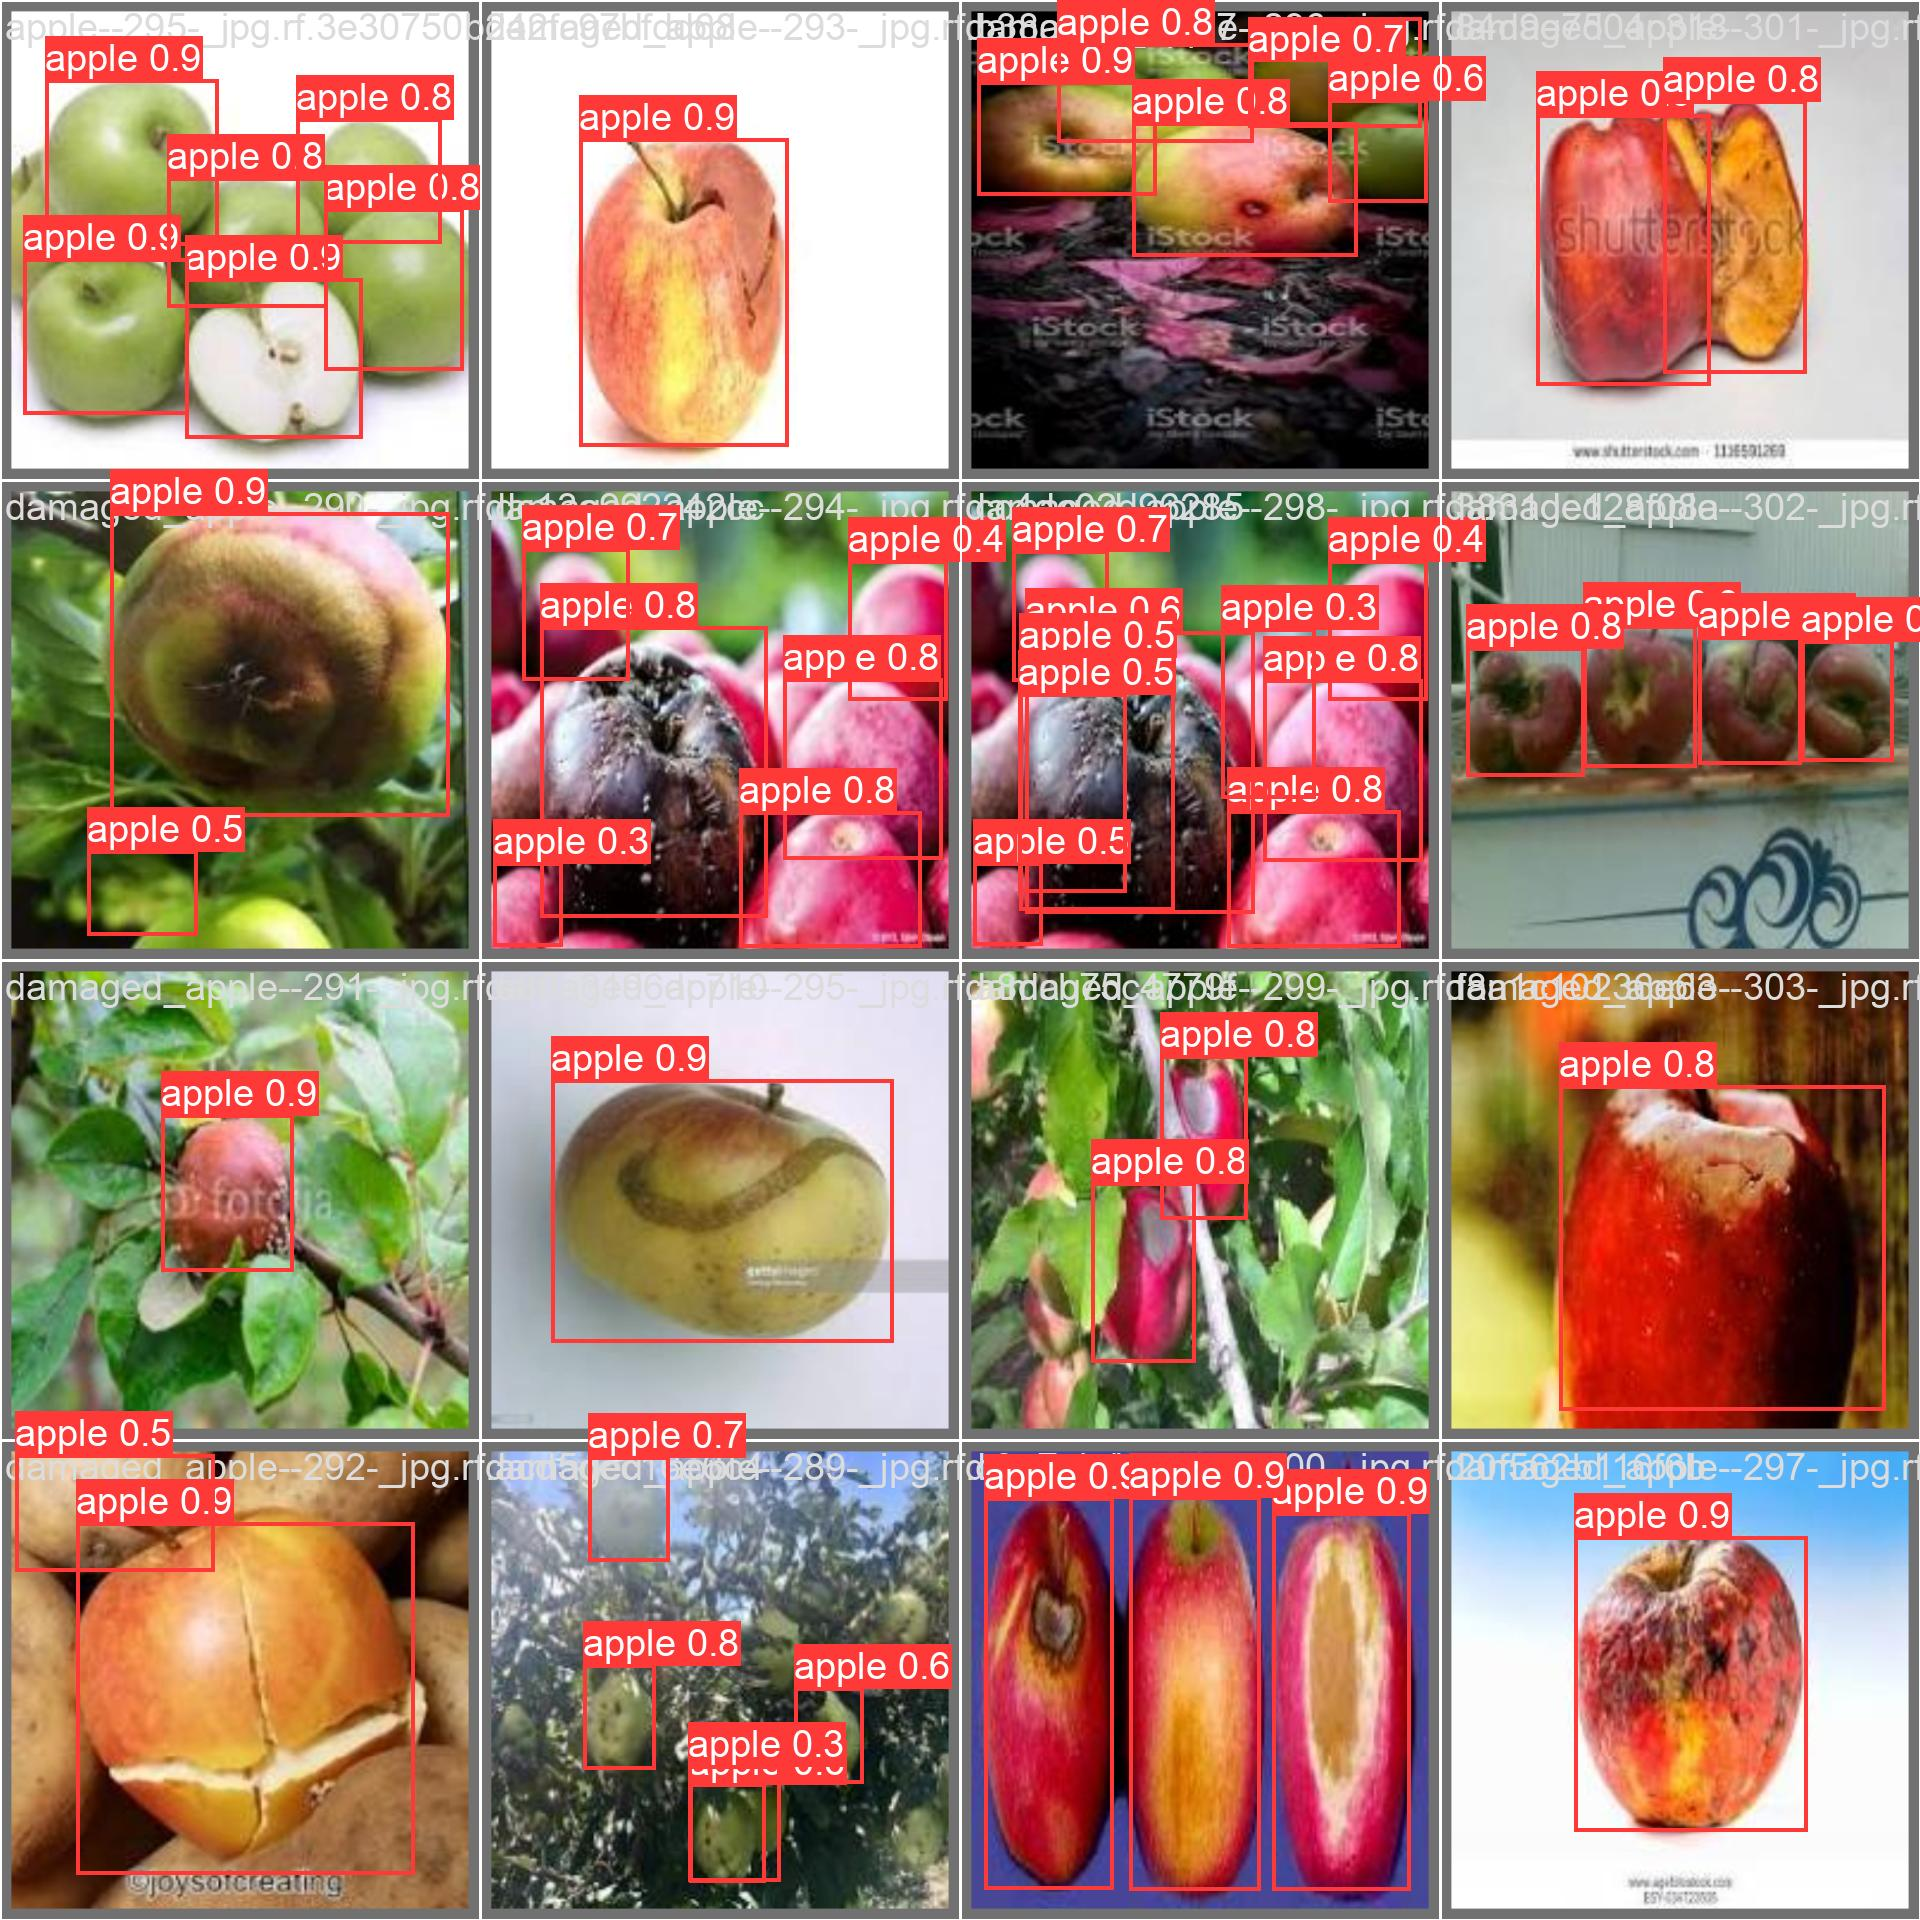

In [ ]:
Image(filename = f'/content/runs/detect/train2/val_batch0_pred.jpg',width=600)

CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0


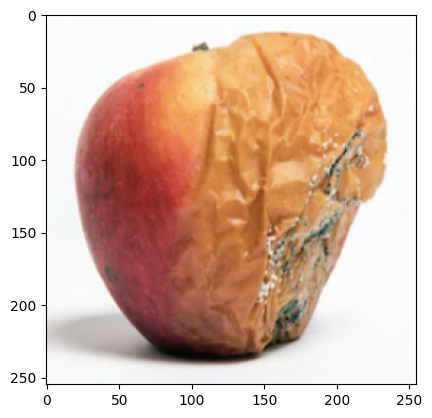

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your dataset directory
dataset_dir = '/content/drive/MyDrive/minar project dataset/train'

# Define image size
image_height, image_width = 255,255

# Function to load and preprocess images
def load_images(dataset_dir):
    images = []
    labels = []
    for category in os.listdir(dataset_dir):
        category_dir = os.path.join(dataset_dir, category)
        label = 1 if category == 'fresh_apple' else 0  # Assign labels (0 or 1) based on folder names
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_height, image_width))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = img.astype('float32') / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
images, labels = load_images(dataset_dir)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


print(train_labels[1])
import matplotlib.pyplot as plt
plt.imshow(train_images[1])
plt.show()


In [ ]:
train_labels[:5]

array([0, 0, 0, 1, 1])

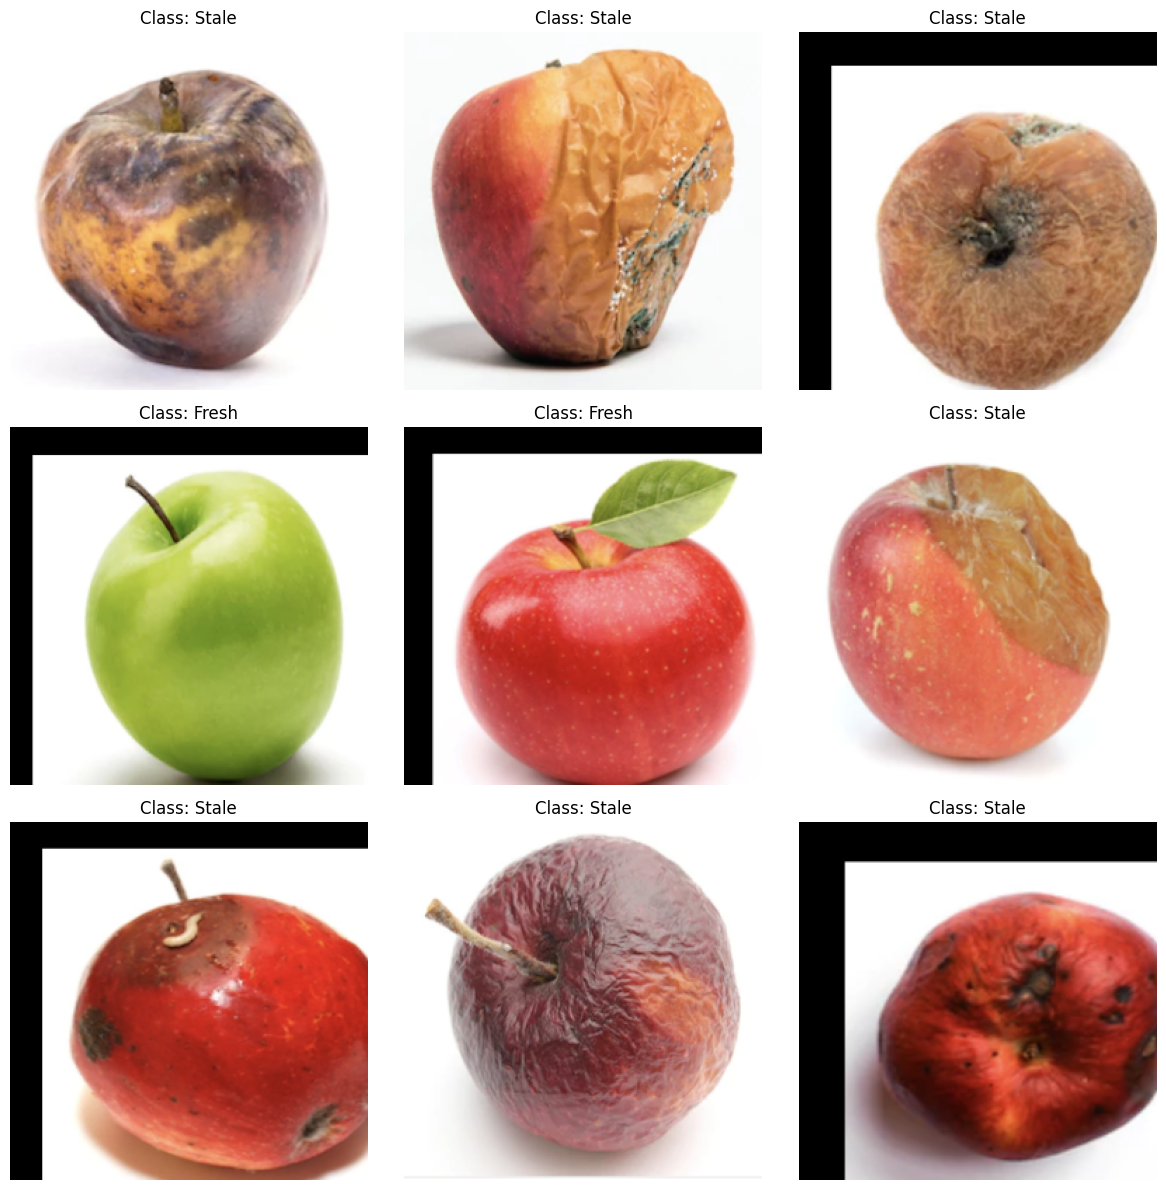

In [ ]:

class_names = ['Stale', 'Fresh']

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    axs[i // 3, i % 3].imshow(train_images[i])
    axs[i // 3, i % 3].set_title(f"Class: {class_names[train_labels[i]]}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
num_channels=3
model2 = models.Sequential()

# Convolutional layers
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))



# Flatten layer
model2.add(layers.Flatten())

# Dense layers
model2.add(layers.Dense(255, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history=model2.fit(train_images, train_labels, epochs=50, validation_data=(train_images, train_labels))


Epoch 1/50
22/22 [==============================] - 6s 196ms/step - loss: 0.6872 - accuracy: 0.5974 - val_loss: 0.5899 - val_accuracy: 0.6103
Epoch 2/50
22/22 [==============================] - 2s 92ms/step - loss: 0.5544 - accuracy: 0.6490 - val_loss: 0.5655 - val_accuracy: 0.6146
Epoch 3/50
22/22 [==============================] - 2s 96ms/step - loss: 0.4868 - accuracy: 0.7407 - val_loss: 0.4419 - val_accuracy: 0.7851
Epoch 4/50
22/22 [==============================] - 2s 98ms/step - loss: 0.4872 - accuracy: 0.7493 - val_loss: 0.4793 - val_accuracy: 0.7421
Epoch 5/50
22/22 [==============================] - 2s 87ms/step - loss: 0.4450 - accuracy: 0.7908 - val_loss: 0.3964 - val_accuracy: 0.7908
Epoch 6/50
22/22 [==============================] - 2s 93ms/step - loss: 0.3594 - accuracy: 0.8381 - val_loss: 0.3467 - val_accuracy: 0.8309
Epoch 7/50
22/22 [==============================] - 2s 99ms/step - loss: 0.3042 - accuracy: 0.8754 - val_loss: 0.2547 - val_accuracy: 0.9183
Epoch 8/50
2

In [ ]:
test_loss, test_accuracy = model2.evaluate(test_images, test_labels)


6/6 [==============================] - 0s 30ms/step - loss: 0.1713 - accuracy: 0.9600


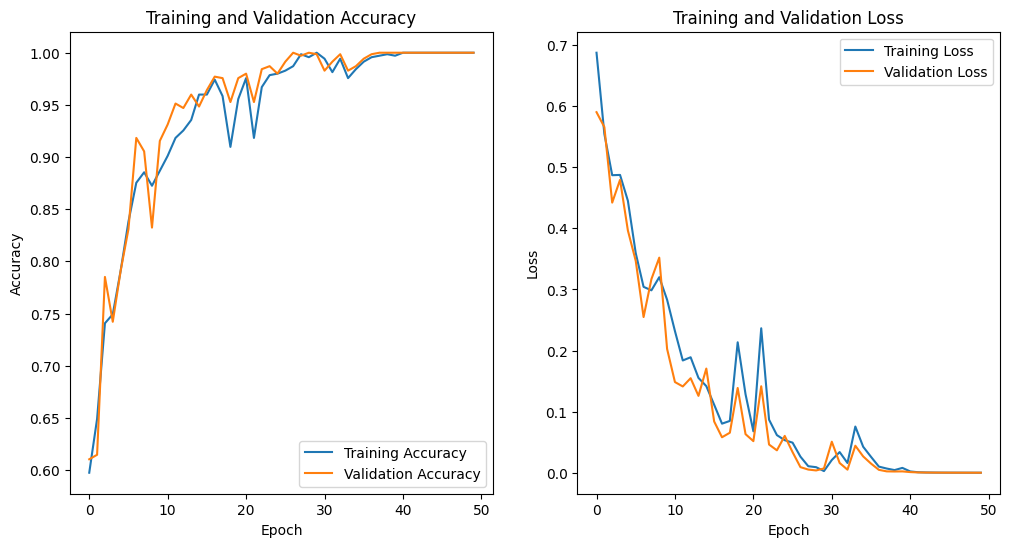

In [ ]:

import matplotlib.pyplot as plt

def plot_training_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation accuracy values
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend()

    # Plot training and validation loss values
    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.show()

# Plot training history
plot_training_history(history)


In [ ]:
# Save in HDF5 format
model2.save('/content/drive/My Drive/CNN_model.h5')


1/1 [==============================] - 1s 1s/step


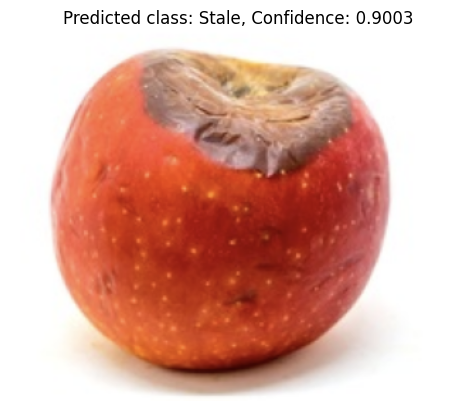

In [ ]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
# model12 = tf.keras.models.load_model('/content/path/to/save/your/model2.h5')

# Define image size
image_height, image_width = 255, 255

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Directory containing dataset
dataset_dir = '/content/drive/MyDrive/minar project dataset/train'

# Get list of all image files in the dataset
image_files = []
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    image_files.extend([os.path.join(category_dir, file) for file in os.listdir(category_dir)])

# Choose a random image from the dataset
random_image_path = random.choice(image_files)

# Preprocess the random image
input_image = preprocess_image(random_image_path)

# Get prediction for the random image
predictions = model2.predict(input_image)
predicted_class = "Fresh" if predictions[0][0] > 0.5 else "Stale"  # Adjust based on your labels
confidence = predictions[0][0] if predicted_class == "Fresh" else (1 - predictions[0][0])  # Confidence score

# Display the random image along with its predicted class
img = cv2.imread(random_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}, Confidence: {confidence:.4f}")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 19ms/step


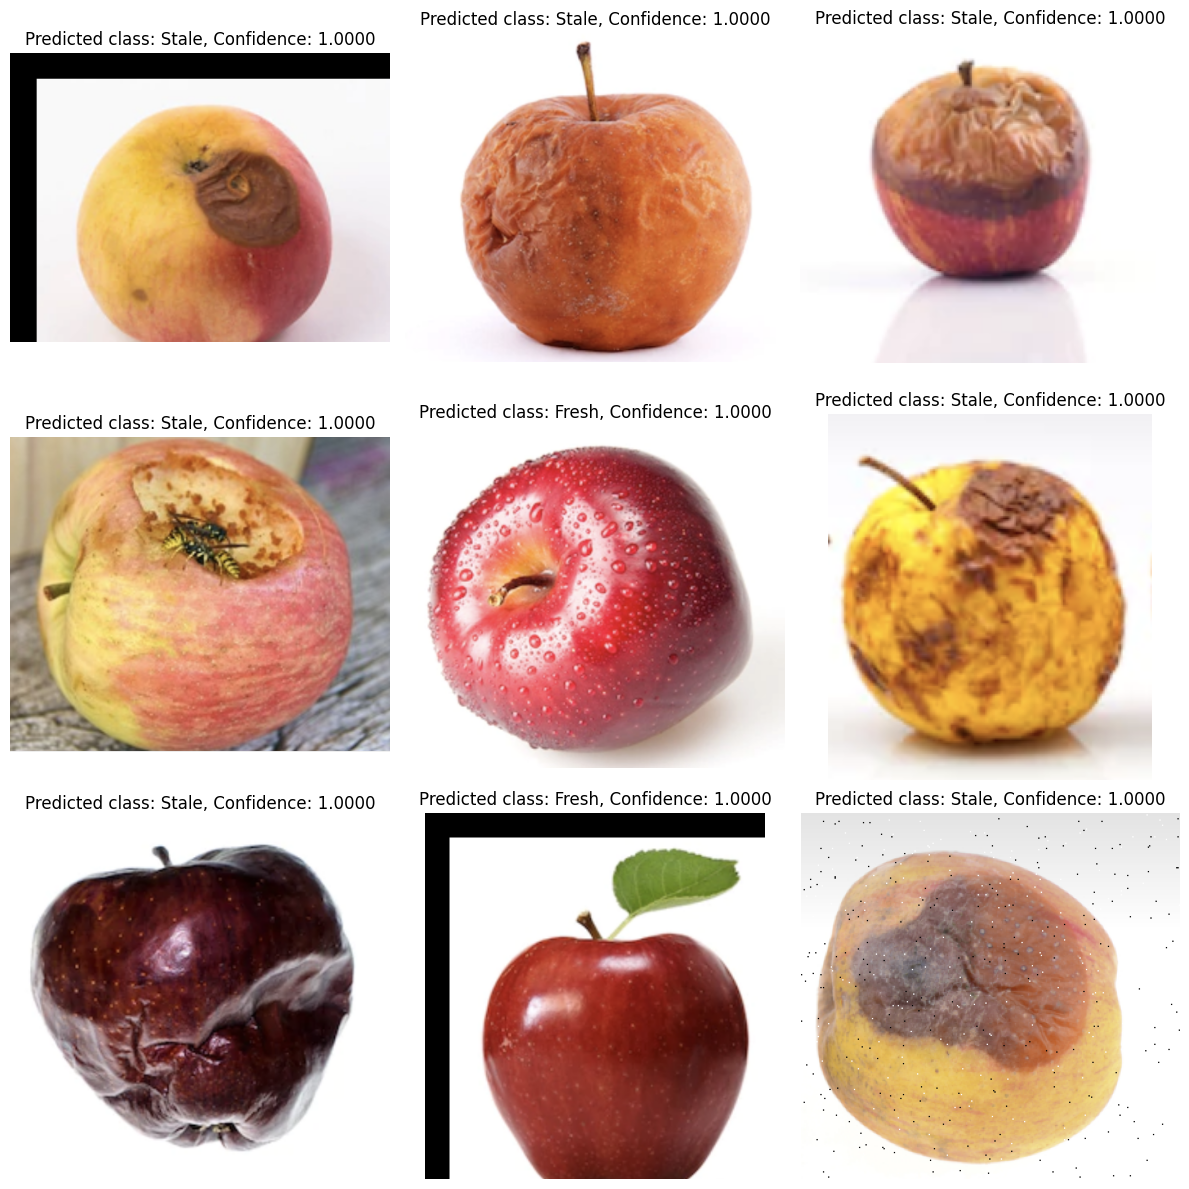

In [ ]:
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained model
# model12 = tf.keras.models.load_model('/content/path/to/save/your/model2.h5')

# Define image size
image_height, image_width = 255, 255

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Directory containing dataset
dataset_dir = '/content/drive/MyDrive/minar project dataset/train'

# Get list of all image files in the dataset
image_files = []
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    image_files.extend([os.path.join(category_dir, file) for file in os.listdir(category_dir)])

# Choose 9 random images from the dataset
random_image_paths = random.sample(image_files, 9)

# Create a subplot with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Loop through each random image
for i, image_path in enumerate(random_image_paths):
    # Preprocess the image
    input_image = preprocess_image(image_path)

    # Get prediction for the image
    predictions = model2.predict(input_image)
    predicted_class = "Fresh" if predictions[0][0] > 0.5 else "Stale"  # Adjust based on your labels
    confidence = predictions[0][0] if predicted_class == "Fresh" else (1 - predictions[0][0])  # Confidence score

    # Display the image along with its predicted class
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].set_title(f"Predicted class: {predicted_class}, Confidence: {confidence:.4f}")
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


### Start Testing

In [ ]:
import os.path
from os import path

if path.exists('/content/apple_yolo_cut_picture') == False:
  os.mkdir('/content/apple_yolo_cut_picture')

os.chdir('/content/apple_yolo_cut_picture')


In [ ]:
from ultralytics import YOLO

import cv2

# Load the YOLOv8 model
model = YOLO('/content/yolov8n.pt')

# Perform inference on an image
results = model('/content/drive/MyDrive/Image/Image1.jpg')

# Load the original image
image = "/content/drive/MyDrive/Image/Image1.jpg"
img = cv2.imread(image)

# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()

new_path='/content/apple_yolo_cut_picture'

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    # Save the cropped object as an image
    cv2.imwrite('/content/apple_yolo_cut_picture/ultralytics_crop_' + str(i) + '.jpg', ultralytics_crop_object)


image 1/1 /content/drive/MyDrive/Image/Image1.jpg: 640x480 1 surfboard, 1 apple, 19.7ms
Speed: 2.6ms preprocess, 19.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


Input image:


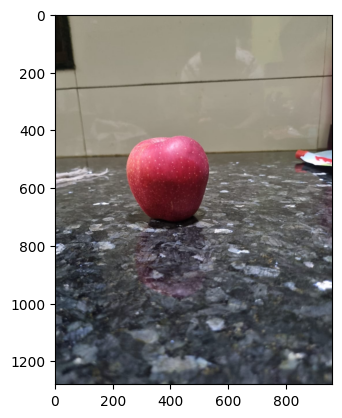

1/1 [==============================] - 0s 48ms/step
Predicted class: fresh_apple
Confidence: 1.0


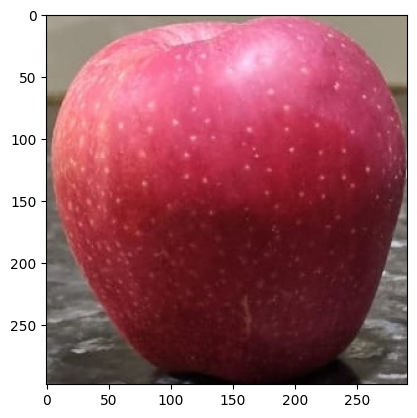

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path2='/content/drive/MyDrive/Image/Image1.jpg'
print("Input image:")
testImage2 = img.imread(image_path2)

# displaying the image
plt.imshow(testImage2)
# plt.imshow(image_path)
plt.show()

# Load the trained model
# model = tf.keras.models.load_model('/content/drive/MyDrive/minar_project_dataset/train/stale_apple/Screen Shot 2018-06-07 at 2.15.50 PM.png')

# Function to preprocess input image(s)
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_height, image_width))
    img = img.astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Example usage: Get prediction for a single image
# image_path = '/content/drive/MyDrive/Image/image3.jpg'

image_path = '/content/apple_yolo_cut_picture/ultralytics_crop_0.jpg'
# image_path = '/content/drive/MyDrive/minar_project_dataset/test/stale_apple/vertical_flip_Screen Shot 2018-06-08 at 2.29.33 PM.png'

input_image = preprocess_image(image_path)
predictions = model2.predict(input_image)

# Interpret the predictions
predicted_class = "fresh_apple" if predictions[0][0] > 0.5 else "stale_apple"  # Adjust based on your labels
confidence = predictions[0][0] if predicted_class == "fresh_apple" else 1 - predictions[0][0]  # Confidence score
print("Predicted class:", predicted_class)
print("Confidence:", confidence)



# reading the image
testImage = img.imread(image_path)

# displaying the image
plt.imshow(testImage)
# plt.imshow(image_path)
plt.show()